In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()

# 목표변수 설정하기
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1, inplace=False)

In [48]:
# train과 test 데이터를 7:3 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (151, 13)
train data Y size : (151,)
test data X size : (101, 13)
test data Y size : (101,)


In [49]:
lr_model = smf.ols(formula="FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     133.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           4.38e-68
Time:                        10:24:49   Log-Likelihood:                -726.92
No. Observations:                 252   AIC:                             1466.
Df Residuals:                     246   BIC:                             1487.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7037      6.231      0.434      0.6

In [50]:
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=10, min_impurity_split=26, max_depth=7)
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=7, min_impurity_split=26, min_samples_leaf=10,
                      random_state=1234)

In [51]:
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6, max_depth= 4, min_samples_split=14)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [52]:
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf = 11, min_samples_split = 22, \
                                    max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [53]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [], [], [], []

In [54]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [55]:
rf_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [22]:
rf_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

AttributeError: 'function' object has no attribute 'append'

In [58]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

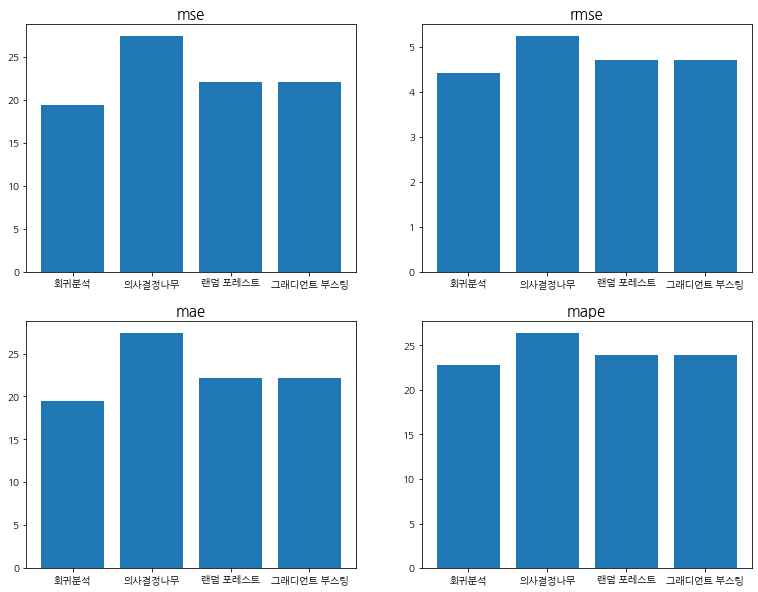

In [59]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mse)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

In [1]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()

# 목표변수 설정하기
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1, inplace=False)

NameError: name 'pd' is not defined

In [61]:
# train과 test 데이터를 7:3 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))# train과 test 데이터를 7:3 비율로 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (265, 10)
train data Y size : (265,)
test data X size : (177, 10)
test data Y size : (177,)
train data X size : (265, 10)
train data Y size : (265,)
test data X size : (177, 10)
test data Y size : (177,)


In [62]:
lr_model = smf.ols(formula="Y ~ GENDER+BMI+HDL+TCH+LTG", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     80.55
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           9.30e-60
Time:                        10:38:49   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4817.
Df Residuals:                     436   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -186.1265     37.219     -5.001      0.0

In [63]:
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=10, min_impurity_split=26, max_depth=7)
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=7, min_impurity_split=26, min_samples_leaf=10,
                      random_state=1234)

In [64]:
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6, max_depth= 4, min_samples_split=14)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [65]:
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf = 11, min_samples_split = 22, \
                                    max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [66]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [], [], [], []

In [67]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [68]:
rf_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [69]:
rf_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [70]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

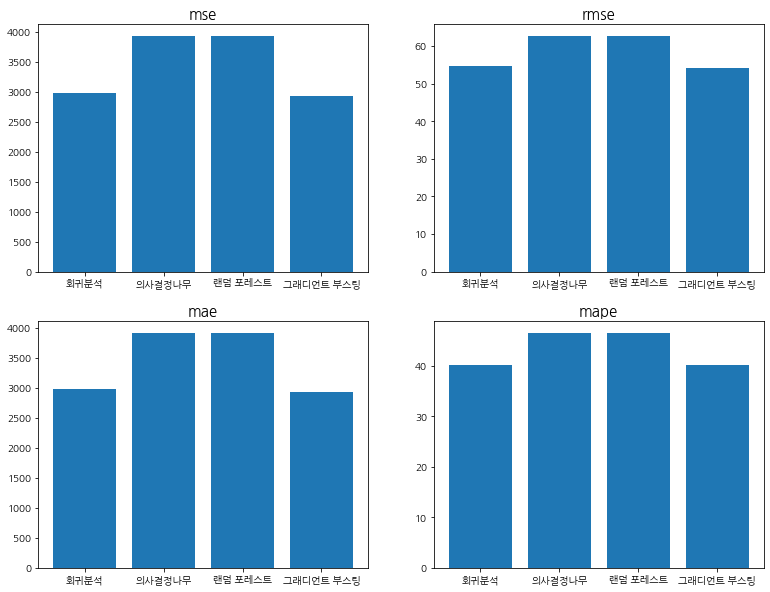

In [71]:
fig, ax = plt.subplots(2, 2, figsize = (13, 10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mse)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

In [10]:
from sklearn.preprocessing import StandardScaler

In [30]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()


# 목표변수 설정하기
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1)

df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [31]:
df_raw_y.head()

0    35.2
1    11.8
2    22.2
3    10.6
4    47.5
Name: FAT, dtype: float64

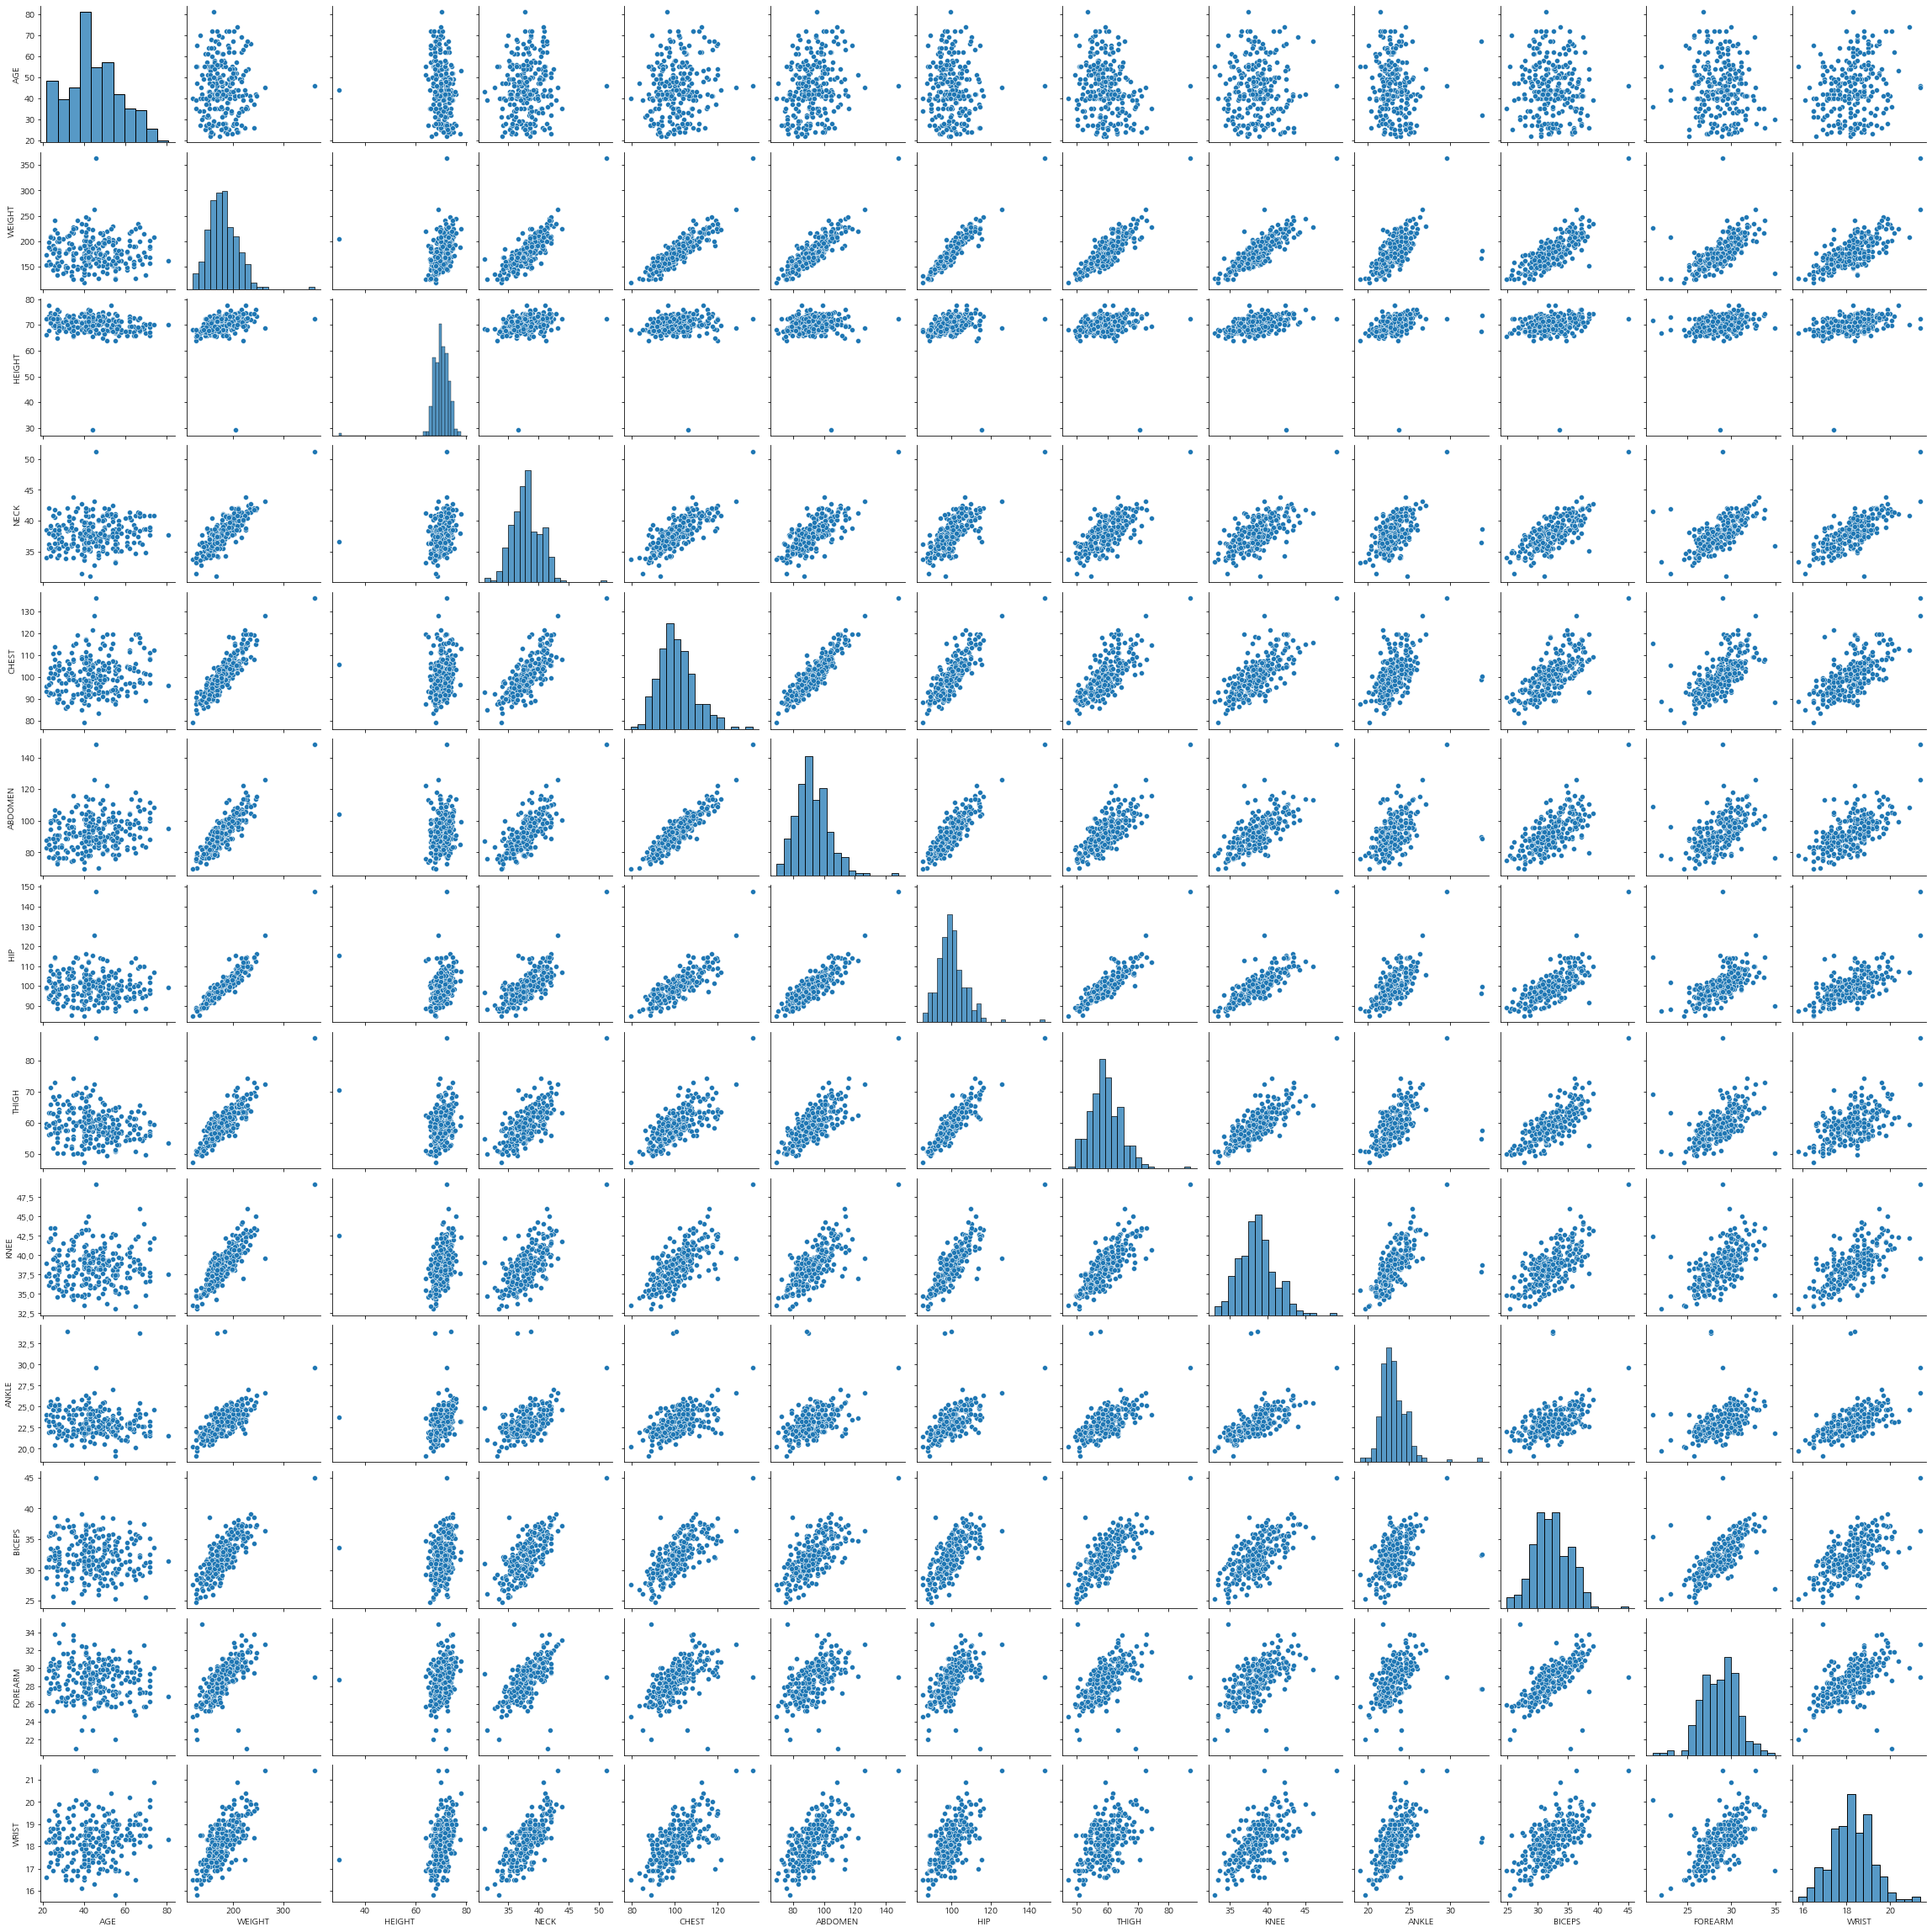

In [14]:
sns.pairplot(df_raw_x)

In [32]:
df_raw_x.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,44.885,178.924,70.149,37.992,100.824,92.556,99.905,59.406,38.590,23.102,32.273,28.664,18.230
std,12.602,29.389,3.663,2.431,8.430,10.783,7.164,5.250,2.412,1.695,3.021,2.021,0.934
min,22.000,118.500,29.500,31.100,79.300,69.400,85.000,47.200,33.000,19.100,24.800,21.000,15.800
25%,35.750,159.000,68.250,36.400,94.350,84.575,95.500,56.000,36.975,22.000,30.200,27.300,17.600
50%,43.000,176.500,70.000,38.000,99.650,90.950,99.300,59.000,38.500,22.800,32.050,28.700,18.300
75%,54.000,197.000,72.250,39.425,105.375,99.325,103.525,62.350,39.925,24.000,34.325,30.000,18.800
max,81.000,363.150,77.750,51.200,136.200,148.100,147.700,87.300,49.100,33.900,45.000,34.900,21.400


In [45]:
x_cols = df_raw_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data : \n {}".format(nd_scaled[:].round(3)))
print("Shape : \n {}".format(nd_scaled.shape))

Scaled Data : 
 [[ 0.089  6.281  0.575 ...  4.221  0.167  3.403]
 [-1.422 -0.372  0.301 ... -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451 ... -0.489 -1.47   0.612]
 ...
 [-0.786 -0.551 -1.135 ... -0.389 -1.123 -1.427]
 [ 0.884 -0.381 -0.451 ...  0.042  0.514  0.827]
 [-0.229 -0.372  0.37  ... -0.489 -0.428 -1.427]]
Shape : 
 (252, 13)


In [46]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [47]:
df_scaled.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.820,-2.060,-11.120,-2.841,-2.558,-2.152,-2.085,-2.330,-2.323,-2.366,-2.479,-3.800,-2.608
25%,-0.726,-0.679,-0.519,-0.656,-0.769,-0.742,-0.616,-0.650,-0.671,-0.652,-0.688,-0.676,-0.676
50%,-0.150,-0.083,-0.041,0.003,-0.140,-0.149,-0.085,-0.077,-0.038,-0.179,-0.074,0.018,0.075
75%,0.725,0.616,0.575,0.591,0.541,0.629,0.506,0.562,0.554,0.531,0.680,0.663,0.612
max,2.872,6.281,2.079,5.444,4.205,5.161,6.685,5.324,4.366,6.383,4.221,3.092,3.403


In [48]:
pca = PCA(n_components=13)
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data : \n {}".format(nd_pca[:]))
print("Shape : \n {}".format(nd_pca.shape))

PCA Data : 
 [[ 1.51407865e+01  7.49180061e-01  1.73038829e+00 ...  1.11830608e+00
  -3.74402932e-01 -4.01646380e-01]
 [-1.25745311e+00 -1.79805793e+00 -6.03591475e-01 ... -8.75860804e-02
  -1.14957740e-01 -2.18982014e-01]
 [-7.27442052e-01  2.31886158e+00 -8.92096811e-01 ...  1.76015189e-01
  -7.71764507e-02 -1.35788495e-01]
 ...
 [-1.35658405e+00  6.71920020e-03  2.06135865e+00 ... -4.68785817e-01
   1.38243001e-01  1.63924588e-01]
 [-2.71168719e-01  8.86972856e-01 -7.58816591e-01 ...  2.14673223e-01
   3.34094001e-01  6.43607961e-02]
 [-1.31086152e+00 -6.66342812e-01  6.28196741e-01 ...  4.64392589e-02
   4.53611687e-02  2.06940192e-02]]
Shape : 
 (252, 13)


In [49]:
df_pca = pd.DataFrame(nd_pca, columns=["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6", "Prin7", "Prin8", "Prin9", "Prin10", "Prin11", "Prin12", "Prin13"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,...,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,...,2.975628,-1.201404,1.916492,-0.565466,0.641640,-0.716668,0.667288,1.118306,-0.374403,-0.401646
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,...,-0.405941,1.333247,0.822237,0.174463,-1.018015,0.036926,0.376706,-0.087586,-0.114958,-0.218982
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,...,0.682580,-0.503280,0.600209,-0.516401,-0.009564,0.047944,-0.264350,0.176015,-0.077176,-0.135788
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,...,-0.575637,0.019772,-0.178803,0.716879,0.843042,0.218223,-0.255256,-0.238794,-0.100887,-0.122172
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,...,-0.023366,-0.406979,1.146568,1.701175,-0.101494,0.539822,0.304860,0.468418,0.275033,0.090397


In [50]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1, 14)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


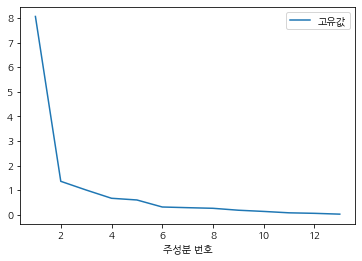

In [51]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "고유값")
plt.ylabel =("고유값(EigenValues)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

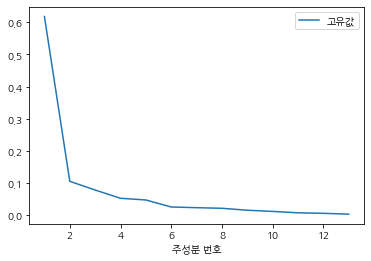

In [52]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label = "고유값")
plt.ylabel =("고유값(EigenValues)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [53]:
x_cols = pd.DataFrame({"Feature" :df_raw_x.columns})
df_eigenvetor = pd.concat([x_cols, pd.DataFrame(pca.components_.T *-1, \
                                               columns=["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6","Prin7", "Prin8", "Prin9", "Prin10", "Prin11", "Prin12", "Prin13"])], axis=1)
df_eigenvetor.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,AGE,-0.010,-0.751,0.420,-0.079,-0.040,0.294,0.034,-0.207,0.152,-0.262,0.031,0.166,0.041
1,WEIGHT,-0.345,0.018,-0.039,-0.087,0.142,-0.031,-0.076,0.047,-0.061,0.019,-0.206,0.190,0.872
2,HEIGHT,-0.101,0.469,0.678,-0.082,0.485,0.115,-0.134,-0.102,-0.005,-0.124,0.062,-0.008,-0.090
3,NECK,-0.306,-0.090,0.121,0.206,0.055,-0.561,-0.007,0.115,0.703,0.048,-0.073,-0.013,-0.095
4,CHEST,-0.316,-0.209,-0.061,0.009,0.152,-0.070,-0.450,0.061,-0.248,0.431,0.398,0.409,-0.214
5,ABDOMEN,-0.312,-0.265,-0.122,-0.120,0.229,0.033,-0.295,0.086,-0.140,-0.086,-0.037,-0.791,-0.046
6,HIP,-0.326,-0.003,-0.221,-0.178,0.163,0.045,0.049,0.101,-0.134,-0.323,-0.609,0.343,-0.403
7,THIGH,-0.310,0.123,-0.322,-0.077,0.096,0.062,0.273,-0.041,0.115,-0.522,0.631,0.073,0.018
8,KNEE,-0.308,0.050,0.001,-0.247,0.005,0.497,0.443,0.137,0.272,0.540,-0.013,-0.088,-0.076
9,ANKLE,-0.231,0.224,0.128,-0.500,-0.679,-0.032,-0.347,-0.167,0.106,-0.080,0.011,-0.024,-0.035


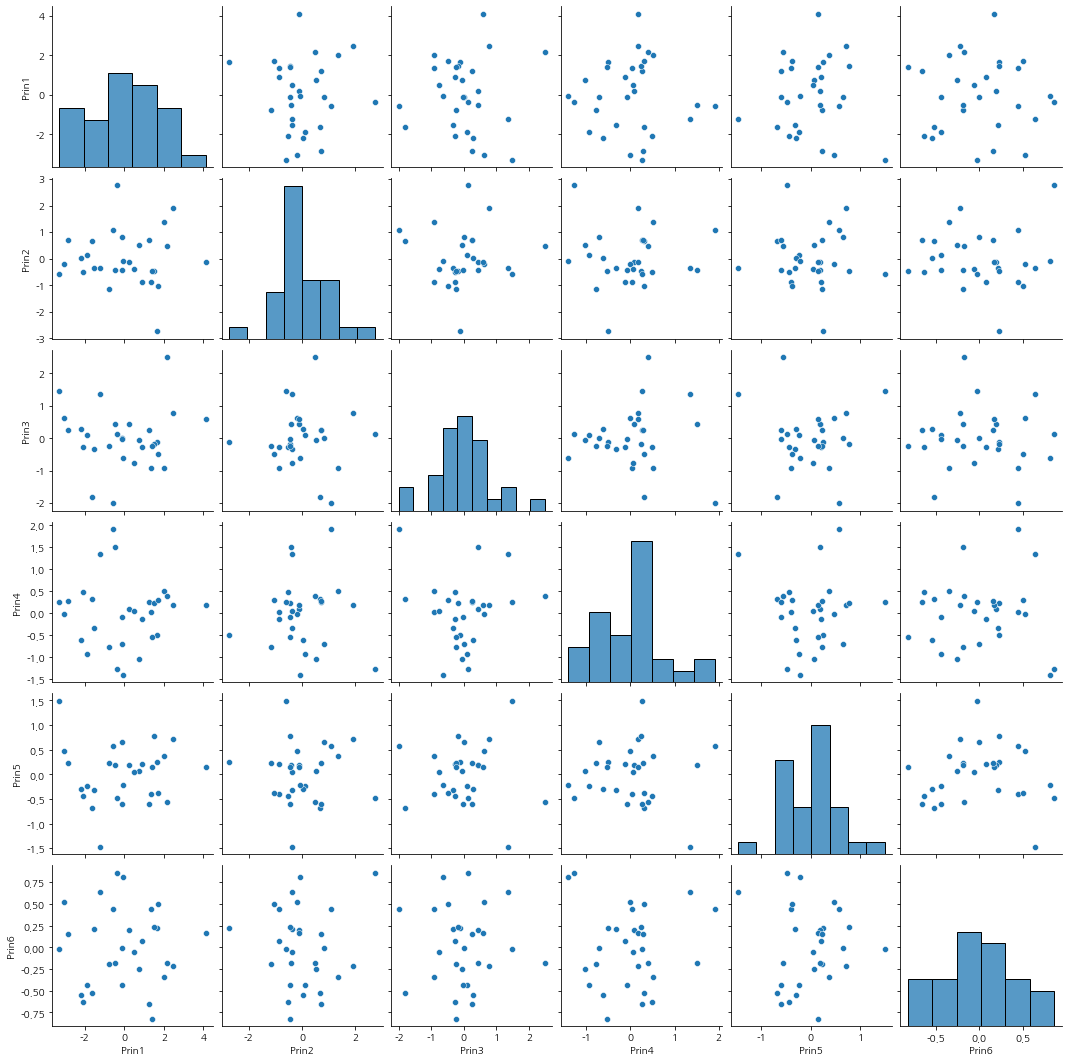

In [37]:
sns.pairplot(df_pca)

In [54]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           7.72e-64
Time:                        09:51:54   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

In [57]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           7.72e-64
Time:                        09:52:23   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1508      0.271     70.613      0.0

In [58]:
x_var = ["Prin1", "Prin2", "Prin3"]

df_pca_const = sm.add_constant(df_pca[x_var])

In [48]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime

In [49]:
# 데이터 불러오기
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/환율.csv', parse_dates=["APPL_DATE"], encoding='euc-kr')
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


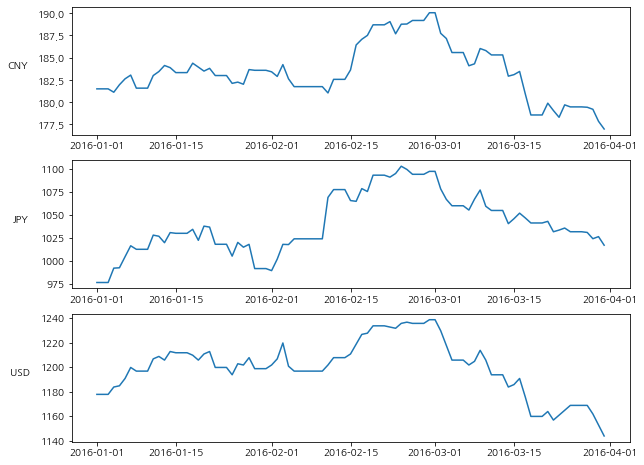

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize = (10, 8))
for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY", "USD"]):
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [52]:
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [55]:
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [56]:
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]

print("Shape of train data : {}".format(df_CNY_train.shape))
print("Shape of test data : {}".format(df_CNY_test.shape))

Shape of train data : (82, 1)
Shape of test data : (9, 1)


In [57]:
df_CNY_train = df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test = df_CNY[df_CNY.index > "2016-03-22"]

df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<AxesSubplot:xlabel='APPL_DATE'>

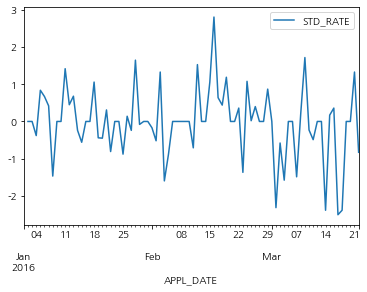

In [58]:
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

<AxesSubplot:xlabel='APPL_DATE'>

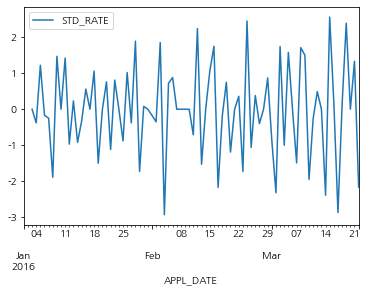

In [59]:
df_CNY_diff2 = df_CNY_train - 2 * (df_CNY_train.shift(1)) + (df_CNY_train.shift(2))
df_CNY_diff2.plot()

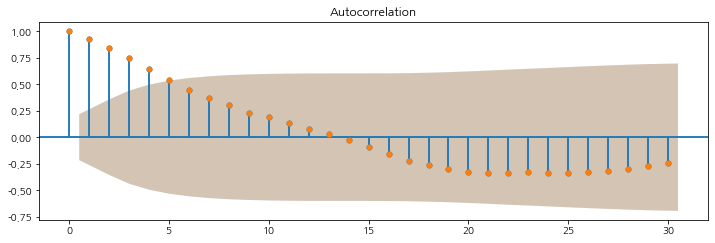

In [60]:
lag_size = 30
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags = lag_size, ax = ax1)
ax2 = fig.add_subplot(211)
fig = plot_acf(df_CNY_train["STD_RATE"], lags = lag_size, ax = ax2)

In [ ]:
ts_model_cny = ARIMA(df_CNY_train, order = (1, 2, 0))
ts_result_cny = ts_model_cny.fit(trend="c")